# Surface Routes Analysis

In [65]:
###WL-Load dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import modf
import time
import datetime
import os

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'figure.autolayout': True})

import warnings
warnings.filterwarnings("ignore")

In [2]:
###WL - Setup Dataframe
file = './Resources/CleanedData/surface_master.csv'
df = pd.read_csv(file)

###WL - Filter out 0 < min delay < 20
df = df.loc[(df['Min Delay'] < 20) & (df['Min Delay'] > 0)]

In [3]:
###WL - Logic to create a new column that calculates the season based on month value
winter_index = df[df['Month'].isin([12,1,2])].index
spring_index = df[df['Month'].isin([3,4,5])].index
summer_index = df[df['Month'].isin([6,7,8])].index
fall_index = df[df['Month'].isin([9,10,11])].index
#print(winter_index)
#print(fall_index)

In [4]:
df.head()
#print(fall_index)

,Unnamed: 0,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
1,1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
2,2,2019-01-03,35,0.30,Tuesday,Finch,Mechanical,9.0,18.0,S/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
3,3,2019-01-03,25,0.50,Tuesday,Don Mills Rd/Eglinton Ave E,Mechanical,9.0,18.0,N/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
4,4,2019-01-03,36,0.67,Tuesday,Humberwood,Investigation,9.0,18.0,E/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None


In [5]:
###WL - Add the season to a new "Season" column.
df.loc[winter_index,'Season']="Winter"
df.loc[spring_index,'Season']="Spring"
df.loc[summer_index,'Season']="Summer"
df.loc[fall_index,'Season']="Fall"


In [6]:
df.head()

,Unnamed: 0,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,...,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday,Season
0,0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,...,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None,Winter
1,1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,...,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None,Winter
2,2,2019-01-03,35,0.30,Tuesday,Finch,Mechanical,9.0,18.0,S/B,...,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None,Winter
3,3,2019-01-03,25,0.50,Tuesday,Don Mills Rd/Eglinton Ave E,Mechanical,9.0,18.0,N/B,...,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None,Winter
4,4,2019-01-03,36,0.67,Tuesday,Humberwood,Investigation,9.0,18.0,E/B,...,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None,Winter


In [7]:
###WL - Group the season_df for season and min delay
season_df = df.groupby('Season').agg({'Min Delay' : 'sum'}).reset_index()
#reset_season_df = season_df.reset_index()
#print(reset_season_df)
#print(season_df)
season_df

,Season,Min Delay
0,Fall,837976.0
1,Spring,931183.0
2,Summer,813892.0
3,Winter,922265.0


# Analysis of "Total Minutes Delay per Season" Plot
The plot shows that there are more total minutes delay in spring and winter than fall and summer

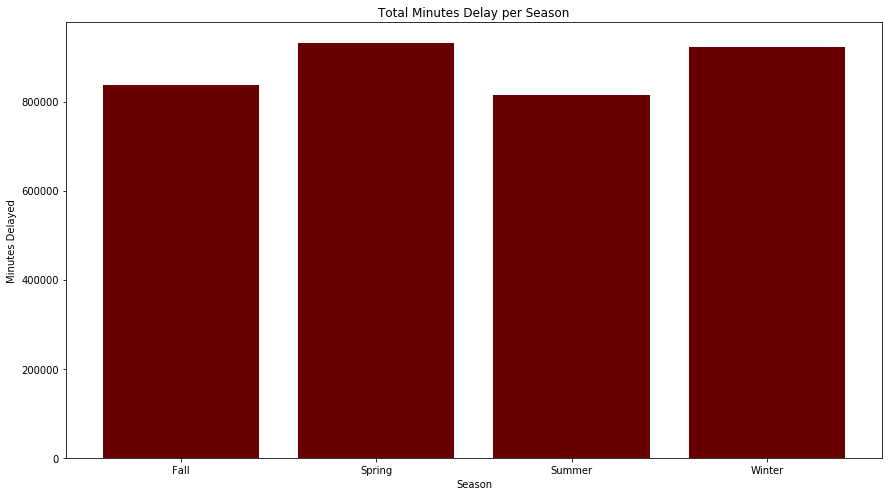

<Figure size 432x288 with 0 Axes>

In [8]:
###WL - plot the bar graph
fig, ax = plt.subplots(1, figsize = [12.5, 7])
plt.xlabel('Season')
plt.ylabel('Minutes Delayed')
plt.title("Total Minutes Delay per Season")
ax.bar(season_df['Season'], season_df['Min Delay'], color='#680000')

plt.show()
plt.savefig('./Output/min_delay_season.png')
fig.show()
fig.savefig('./Output/min_delay_season.png')

In [9]:
###WL - Group the season_df for season and min delay
count_df = df.groupby('Season').agg({'Min Delay' : 'count'}).reset_index()
count_df

,Season,Min Delay
0,Fall,95946
1,Spring,108654
2,Summer,91466
3,Winter,107350


# Analysis of "Total Number of Incidents per Season" Plot
However the difference between fall and summer versuses spring and winter can be explained because there are more number of indicents that occur in spring and winter.

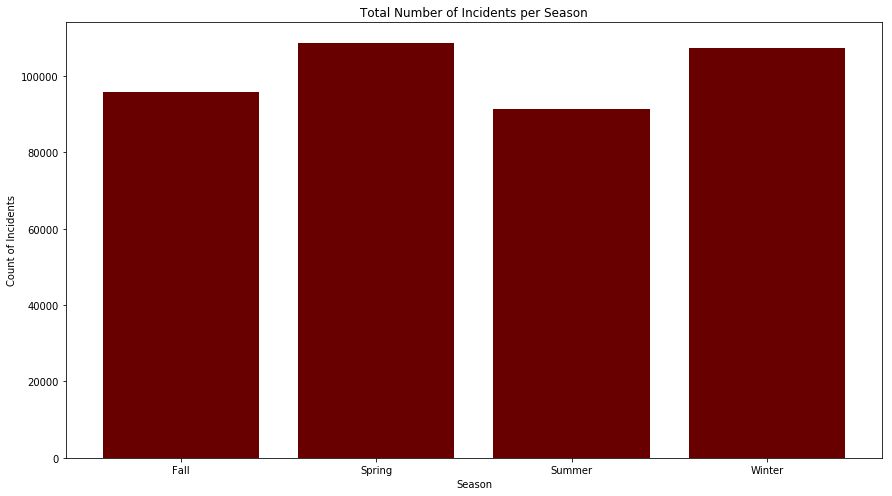

<Figure size 432x288 with 0 Axes>

In [10]:
###WL - plot the bar graph
fig, ax = plt.subplots(1, figsize = [12.5, 7])
plt.xlabel('Season')
plt.ylabel('Count of Incidents')
plt.title("Total Number of Incidents per Season")
ax.bar(count_df['Season'], count_df['Min Delay'], color='#680000')

plt.show()
plt.savefig('./Output/incidents_season.png')
fig.show()
fig.savefig('./Output/incidents_season.png')

# Analysis of "Boxplot grouped by Season" Plot
The boxplot shows that the average length of delay is higher in fall and spring.

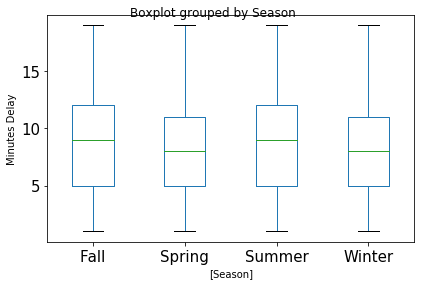

In [11]:
###WL - plot the boxgraph
boxplot_df = df[['Min Delay', 'Season']]
#df = df.loc[(df['Min Delay'] < 20) & (df['Min Delay'] > 0)]

boxplot_df.boxplot(by='Season',grid=False, fontsize=15)
plt.title("")
plt.ylabel("Minutes Delay")
plt.savefig('./Output/min_delay_boxplot.png')

In [12]:
###WL - Incident breakdown by season
incident_df  = df.groupby(['Incident', 'Season']).agg({'Incident' : 'count'})#.reset_index()
incident_df


Incident
Incident              Season          
Diversion             Fall        1875
                      Spring      2069
                      Summer      1848
                      Winter      1557
Emergency Services    Fall        1924
                      Spring      2307
                      Summer      1923
                      Winter      1945
General Delay         Fall       12789
                      Spring     11982
                      Summer      9609
                      Winter     10009
Held By               Fall        1250
                      Spring      1584
                      Summer      1260
                      Winter      1561
Investigation         Fall        9242
                      Spring     10965
                      Summer      9059
                      Winter      9610
Late Leaving Garage   Fall       16841
                      Spring     15835
                      Summer     13520
                      Winter     18673
Mechanical            Fall       36593
                      Spring     45748
                      Summer     38606
                      Winter     46057
Overhead - Pantograph Fall          27
                      Spring        35
                      Summer         9
                      Winter        26
Utilized Off Route    Fall       15405
                      Spring     17253
                      Summer     15629
                      Winter     17912
Vision                Spring        53
                      Summer         2

# Analysis of "Count of Incident grouped by Incident and Season" Plot
We can see that "Mechanical" and "Utilized off Route" incidents occur more frequently in spring and winter

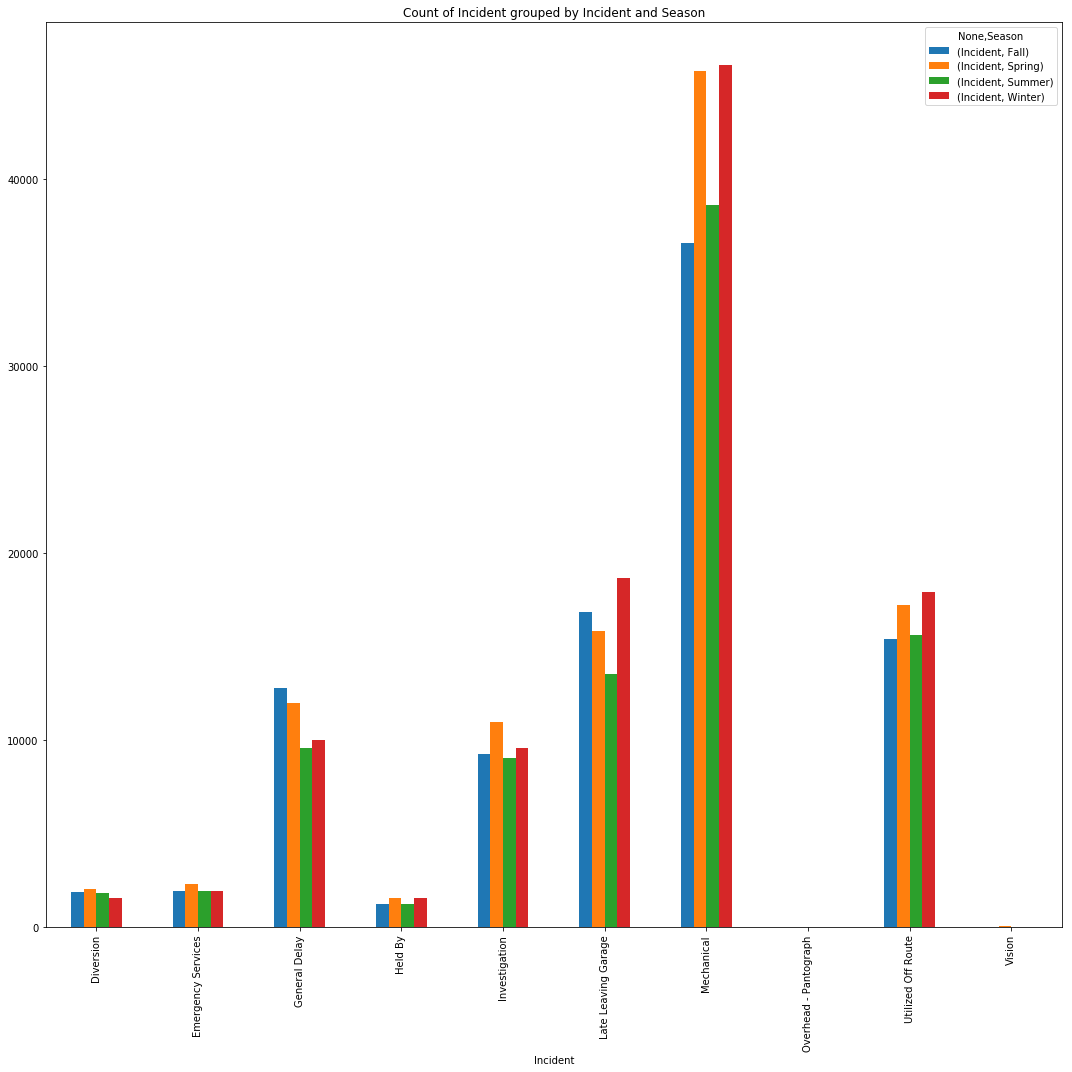

In [13]:
season_name = ['Winter','Spring','Summer','Fall']
incident_name = incident_df['Incident']
#incident_df.plot.bar(x = incident_name, y = ['Winter','Spring','Summer','Fall'])
#incident_df.unstack().plot.bar(figsize = (100,100))
incident_df.unstack().plot.bar(figsize = (15,15), title = "Count of Incident grouped by Incident and Season")
plt.savefig('./Output/incident_by_season.png')

In [14]:
###WL - Incident breakdown by season
incident_mean_df  = df.groupby(['Incident', 'Season']).agg({'Min Delay' : 'mean'})#.reset_index()
incident_mean_df

Min Delay
Incident              Season           
Diversion             Fall     8.186133
                      Spring   8.323828
                      Summer   7.532468
                      Winter   8.228003
Emergency Services    Fall     9.202703
                      Spring   9.201994
                      Summer   9.417057
                      Winter   9.175835
General Delay         Fall    11.240754
                      Spring  10.983642
                      Summer  11.075970
                      Winter  10.916076
Held By               Fall     9.048800
                      Spring   8.957071
                      Summer   9.546032
                      Winter   8.941704
Investigation         Fall     8.999351
                      Spring   8.853808
                      Summer   8.940722
                      Winter   9.047451
Late Leaving Garage   Fall     8.430259
                      Spring   8.027850
                      Summer   8.583284
                      Winter   8.420447
Mechanical            Fall     8.553303
                      Spring   8.529007
                      Summer   8.847873
                      Winter   8.512018
Overhead - Pantograph Fall     6.296296
                      Spring   7.057143
                      Summer   7.777778
                      Winter   6.230769
Utilized Off Route    Fall     7.240831
                      Spring   7.193358
                      Summer   7.977350
                      Winter   7.369864
Vision                Spring  10.452830
                      Summer  11.000000

# Analysis of "Mean Mintues Delayed grouped by Incident and Season" Plot
"Mechanical" and "Utilized off Route" mean mintues delayed are consistant across seasons.

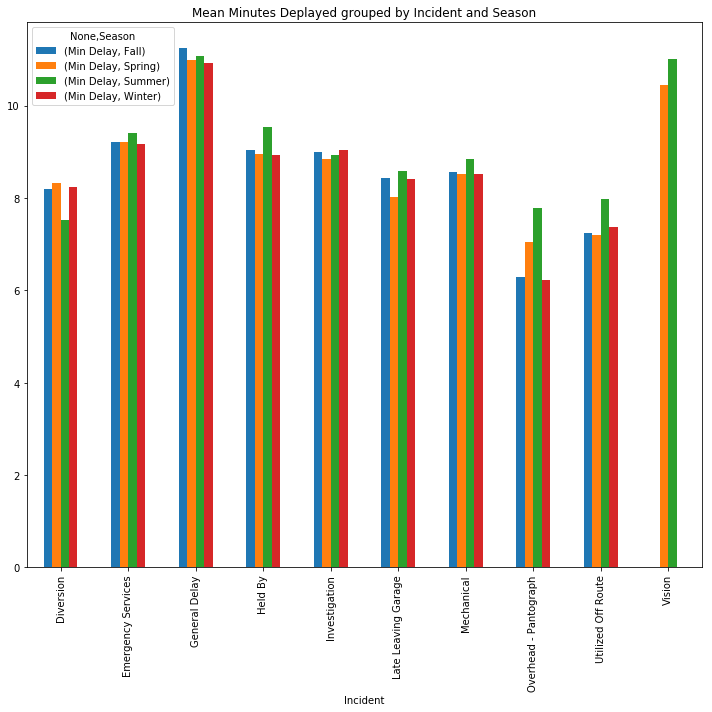

In [15]:
incident_mean_df.unstack().plot.bar(figsize = (10,10), title = "Mean Minutes Deplayed grouped by Incident and Season")
plt.savefig('./Output/mean_min_delay_boxplot.png')

# Analysis of "Mean Temp" Plot
"Mechanical" incidents occur more frequently at 0 degrees and 20 degrees.

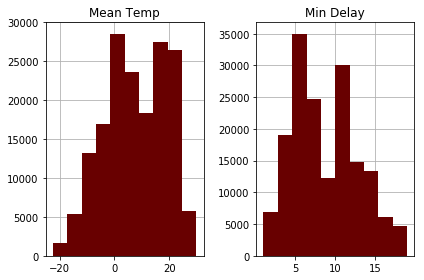

In [16]:
mechanical_df = df[df.Incident == 'Mechanical']
mechanical_df1 = mechanical_df[['Min Delay','Mean Temp']]
mechanical_df1.hist(color='#680000')
plt.savefig('./Output/mean_temperature.png')

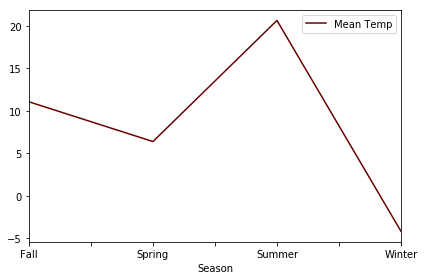

In [17]:
temp_df = df.groupby(['Season']).agg({'Mean Temp' : 'mean'})#.reset_index()
temp_df
temp_df.plot.line(color='#680000')

In [18]:
###WL
group1 = df[df["Season"] == "Fall"]["Min Delay"]
group2 = df[df["Season"] == "Winter"]["Min Delay"]
group3 = df[df["Season"] == "Spring"]["Min Delay"]
group4 = df[df["Season"] == "Summer"]["Min Delay"]


In [19]:
###WL
stats.f_oneway(group1,group2,group3,group4)

F_onewayResult(statistic=119.22722955081571, pvalue=3.503694823182298e-77)

# Summary
Null Hypothesis: Seasonality (fall, winter, summer, spring) has no significant impact on TTC surface route (bus and streetcar) delays.

Alternate Hypothesis: Seasonality has a significant impact on TTC surface route delays.

Analysis: Based on the ANOVA test we have a p-value less than 0.05, so we are rejecting the null hypothesis.  Therefore, seasonality has a significant impact on TTC surface route delays.


# Subway Analysis

## Subway Delay Descriptives

In [57]:
subway = pd.read_csv('./Resources/CleanedData/subway_master.csv')

In [58]:
subway

,Unnamed: 0,Unnamed: 0.1,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
0,0,0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
1,1,1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
2,2,2,2014-01-03,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
3,3,3,2014-01-03,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
4,4,4,2014-01-03,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
5,5,5,2014-01-03,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
6,6,6,2014-01-03,07:31,Wednesday,NORTH YORK CTR STATION,MUNCA,0,0,NaN,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
7,7,7,2014-01-03,07:32,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
8,8,8,2014-01-03,07:34,Wednesday,QUEEN STATION,MUNCA,0,0,NaN,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
9,9,9,2014-01-03,07:34,Wednesday,RUNNYMEDE STATION,MUNCA,0,0,NaN,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None


In [21]:
groupedbyday = subway.groupby(['Date', 'Day']).agg({'Min Delay': 'sum'}).reset_index()

totaldays = len(groupedbyday)
totalmin = groupedbyday['Min Delay'].sum()
meanminperday = round(groupedbyday['Min Delay'].mean(), 2)
medianperday = round(groupedbyday['Min Delay'].median(), 2)
daysdelay = round((groupedbyday['Min Delay'].sum()/60)/24, 2)
percdelay = round(daysdelay / totaldays, 2)
sigmaday = round(groupedbyday['Min Delay'].std(), 2)
delayvariance = round(sigmaday ** 2, 2)

delaystats_dict = {
    'Total Days': totaldays,
    'Total Minutes': totalmin,
    'Days Delayed': daysdelay,
    'Mean Min. per Day': meanminperday,
    'Median Min. per Day': medianperday,
    '% of Days Delayed': percdelay,
    'Daily Sigma': sigmaday,
    'Delay Variance': delayvariance
}

delaystats = pd.DataFrame(delaystats_dict, index=['Stats'])

delaystats = delaystats.style.format({
    '% of Days Delayed': '{:.2%}'.format
})

delaystats

,Total Days,Total Minutes,Days Delayed,Mean Min. per Day,Median Min. per Day,% of Days Delayed,Daily Sigma,Delay Variance
Stats,1946,216403,150.28,111.2,97,8.00%,74.96,5619


## Latitude and Longitude Mapping of Delay Events - Subway

In [22]:

locations = pd.read_csv('./Resources/CleanedData/subway_location.csv')

In [23]:
geo = locations.groupby('Station').agg({
    'subway_latitude': 'mean', 
    'subway_longitude': 'mean',
    'Code': 'count'
})

geo = geo.rename(columns={'Min Delay': 'Min Mean'})

geo = geo[geo['subway_latitude'] > 0].reset_index()

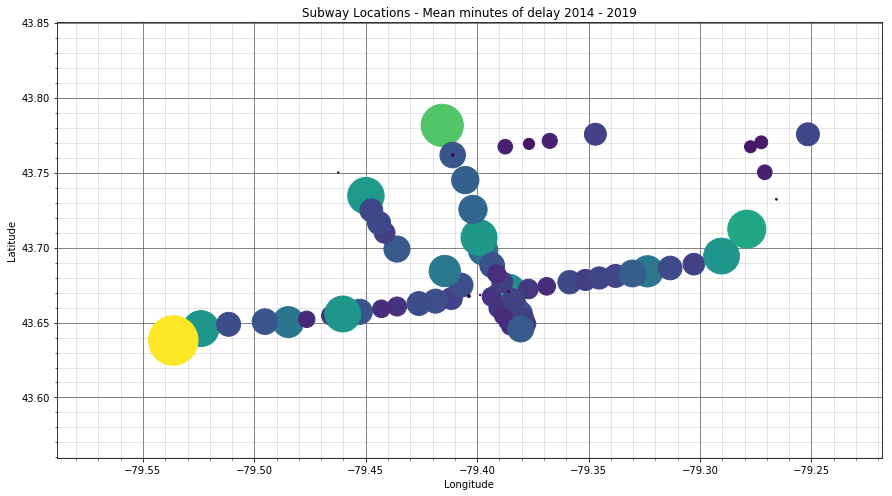

In [24]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    geo['subway_longitude'], 
    geo['subway_latitude'], 
    c = geo['Code'], 
    s = geo['Code']/2
)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Subway Locations - Mean minutes of delay 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()

plt.savefig('./Output/Subway Locations - Mean minutes of delay 2014 - 2019')
plt.show()

In [25]:
station_events = geo[['Station', 'Code']].sort_values('Code', ascending = False)
station_events.head(25)

,Station,Code
31,KIPLING STATION,4900
22,FINCH STATION,3562
62,WARDEN STATION,2896
64,WILSON STATION,2655
19,EGLINTON STATION,2591
26,ISLINGTON STATION,2582
28,KEELE STATION,2580
61,VICTORIA PARK STATION,2566
4,BLOOR STATION,2404
56,ST CLAIR WEST STATION,1957


## Weather and the Subway

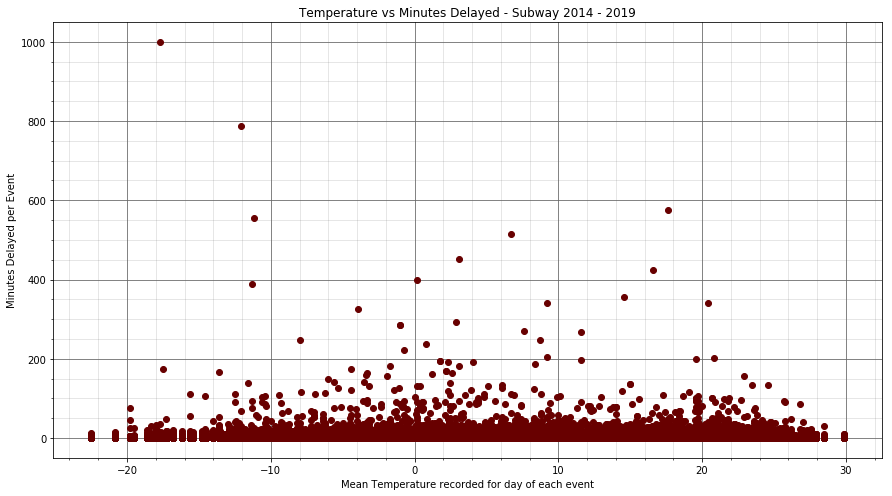

In [26]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    subway['Mean Temp'], 
    subway['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Mean Temperature recorded for day of each event')
ax.set_title('Temperature vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('./Output/Temperature vs Minutes Delayed - Subway 2014 - 2019')

plt.show()

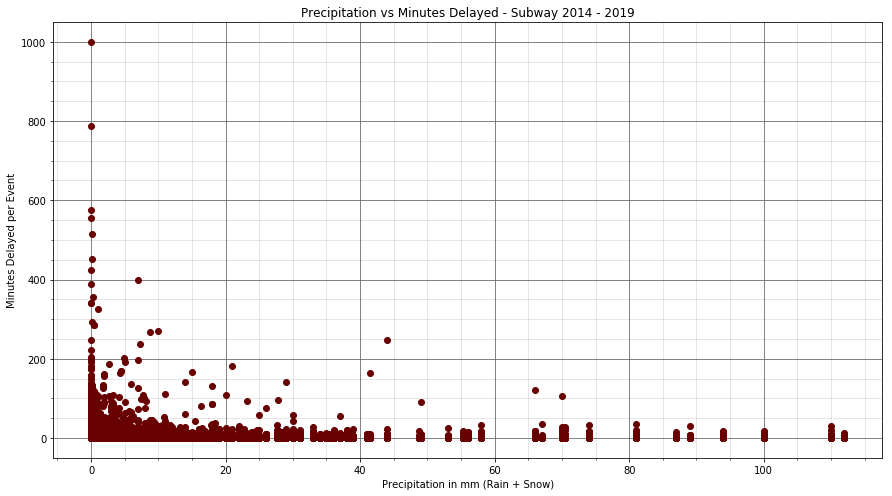

In [27]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    subway['Precipitation'], 
    subway['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Precipitation in mm (Rain + Snow)')
ax.set_title('Precipitation vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('./Output/Precipitation vs Minutes Delayed - Subway 2014 - 2019')

plt.show()

In [64]:

subway.head()

,Unnamed: 0,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
0,0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
1,1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
2,2,2014-01-03,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
3,3,2014-01-03,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
4,4,2014-01-03,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None


## Visualizing Delays 

In [63]:
x = groupedbyday['Date']
y = groupedbyday['Min Delay']

fig, ax = plt.subplots(1, figsize = [15, 3.5])

ax.bar(
    x,
    y, 
    color = '#680000', 
    alpha = .8
)

ax.axhline(
    y = 1440, 
    color = 'red',
    lw = 2
)

ax.axhline(
    y = 0, 
    color = 'red', 
    lw = 2
)

ax.axvline(
    x = groupedbyday.iloc[0, 0], 
    color = 'red', 
    lw = 2
)

ax.axvline(
    x = groupedbyday.iloc[1945, 0], 
    color = 'red', 
    lw = 2
)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days')
ax.set_title('TTC Subway Minutes Delayed by Day 2014 - 2019')

plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('./Output/TTC_Subway_Mintues_Delayed_2014_2019.png')
plt.show()

RuntimeError: Locator attempting to generate 8562 ticks from -97.60000000000001 to 2042.6000000000304: exceeds Locator.MAXTICKS

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000245C0FA0F28> (for post_execute):


RuntimeError: Locator attempting to generate 8562 ticks from -97.60000000000001 to 2042.6000000000304: exceeds Locator.MAXTICKS

RuntimeError: Locator attempting to generate 8562 ticks from -97.60000000000001 to 2042.6000000000304: exceeds Locator.MAXTICKS

<Figure size 1080x252 with 1 Axes>

Each x marker bar is representative of 1 day for a total of 1946 days. 1440 minutes are available in each day, so think of the space within the interior of the red box as time, with the dark blue bars of each delay as the amount of space in time the delays took.

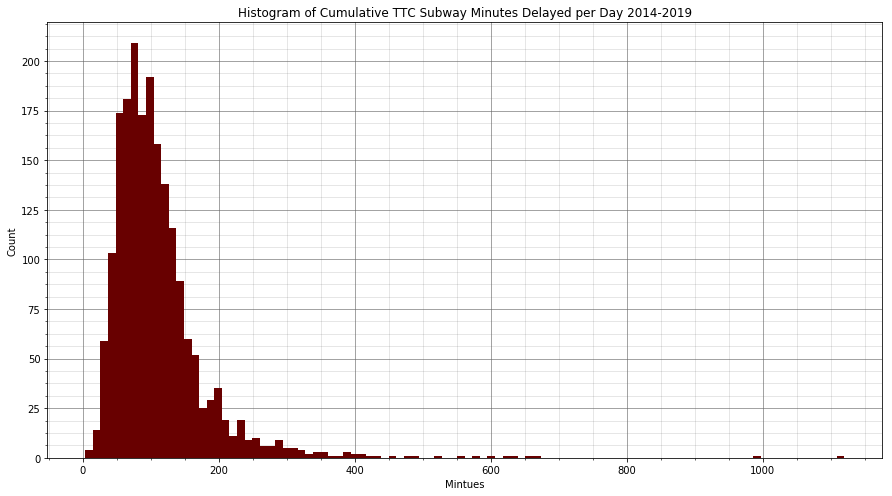

In [29]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(
    groupedbyday['Min Delay'], 
    bins = 100, 
    color = '#680000'
)

ax.set_xlabel('Mintues')
ax.set_ylabel('Count')
ax.set_title('Histogram of Cumulative TTC Subway Minutes Delayed per Day 2014-2019')

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig('./Output/Histogram of Cumulative TTC Subway Minutes Delayed per Day 2014 - 2019.png')

plt.show()

### Incidents 

In [30]:
descriptions = pd.DataFrame(subway['Description'].value_counts()).reset_index().rename(columns={'index': 'Description', 'Description': 'Count'}).reset_index()
#descriptions['Count Order'] = np.arange(1, len(descriptions['Description']))
descriptions.head(25)

,index,Description,Count
0,0,Miscellaneous Speed Control,17720
1,1,Operator Overspeeding,12884
2,2,Passenger Assistance Alarm Activated - No Trou...,7307
3,3,Injured or ill Customer (In Station) - Transpo...,6640
4,4,Miscellaneous Other,5038
5,5,Miscellaneous General Delays,4952
6,6,Disorderly Patron,4398
7,7,Injured or ill Customer (On Train) - Medical A...,3459
8,8,Injured or ill Customer (On Train) - Transported,2849
9,9,Operator Violated Signal,2584


In [31]:
#value_counts.to_csv('subway_description_value_counts.csv')
#value_counts.head()

In [32]:
x

0       2014-01-03
1       2014-01-04
2       2014-01-05
3       2014-01-06
4       2014-01-07
5       2014-01-08
6       2014-01-09
7       2014-01-10
8       2014-01-11
9       2014-01-12
10      2014-01-13
11      2014-01-14
12      2014-01-15
13      2014-01-16
14      2014-01-17
15      2014-01-18
16      2014-01-19
17      2014-01-20
18      2014-01-21
19      2014-01-22
20      2014-01-23
21      2014-01-24
22      2014-01-25
23      2014-01-26
24      2014-01-27
25      2014-01-28
26      2014-01-29
27      2014-01-30
28      2014-01-31
29      2014-02-01
           ...    
1916    2019-04-03
1917    2019-04-04
1918    2019-04-05
1919    2019-04-06
1920    2019-04-07
1921    2019-04-08
1922    2019-04-09
1923    2019-04-10
1924    2019-04-11
1925    2019-04-12
1926    2019-04-13
1927    2019-04-14
1928    2019-04-15
1929    2019-04-16
1930    2019-04-17
1931    2019-04-18
1932    2019-04-19
1933    2019-04-20
1934    2019-04-21
1935    2019-04-22
1936    2019-04-23
1937    2019

## Stations

In [33]:
stations = subway.groupby('Station').agg({
    'Min Delay': 'sum', 
}).rename(
    columns={
        'Min Delay': 'Sum', 
    })

stations = round(stations[stations['Sum'] > 0], 2)

In [34]:
stations = stations.dropna().reset_index()
len(stations)

197

<BarContainer object of 197 artists>

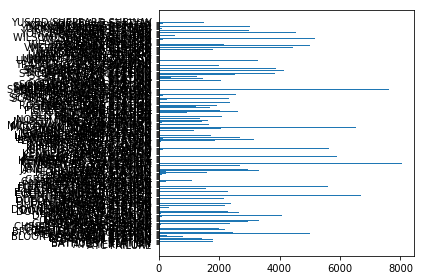

In [35]:
fig, ax = plt.subplots()

ax.barh(stations['Station'], stations['Sum'])

In [36]:
stations.sort_values('Sum', ascending = False).head()

,Station,Sum
71,KENNEDY BD STATION,8049
136,SHEPPARD WEST STATION,7631
43,EGLINTON STATION,6711
103,MCCOWAN STATION,6541
77,KENNEDY SRT STATION,5914


## Days of the Week

In [37]:
subway.sample(5)

,Unnamed: 0,Unnamed: 0.1,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
5364,5364,5364,2014-03-30,15:23,Friday,MCCOWAN STATION,MRTO,0,0,N,...,30,7.4,-1.2,3.1,0.0,0.0,0.0,1.2,47,None
20790,20790,20790,2015-01-10,02:30,Thursday,MCCOWAN STATION TO KEN,TRST,0,0,B,...,10,-8.7,-15.1,-11.9,0.0,0.0,0.0,1.8,57,None
108588,108588,108588,2019-04-18,11:51,Tuesday,CHRISTIE STATION,MUSC,0,0,W,...,18,20.2,6.0,13.1,1.2,0.0,1.2,0.0,49,None
51407,51407,51407,2016-06-21,22:35,Sunday,BLOOR DANFORTH SUBWAY,MUGD,0,0,NaN,...,21,26.2,13.5,19.9,0.0,0.0,0.0,0.0,50,None
49055,49055,49055,2016-05-11,15:06,Monday,RUNNYMEDE STATION,MUPLC,0,0,NaN,...,11,18.1,5.4,11.8,0.0,0.0,0.0,0.0,34,None


In [38]:
weekdays = subway.groupby('Day').agg({
    'Min Delay': 'sum', 
    'Min Gap': 'sum',
    'Code': 'count'
}).rename(
    columns={'Min Delay': 'Sum of Minutes', 'Min Gap': 'Sum of Gap Minutes', 'Code': 'Incident Count'}).reset_index()
weekdays

,Day,Sum of Minutes,Sum of Gap Minutes,Incident Count
0,Friday,33593,49406,17099
1,Monday,32682,47833,16929
2,Saturday,27259,41291,12682
3,Sunday,22299,33808,10807
4,Thursday,32135,47519,17269
5,Tuesday,35236,50004,17154
6,Wednesday,33199,48047,17263


In [39]:
weekdays.head()

,Day,Sum of Minutes,Sum of Gap Minutes,Incident Count
0,Friday,33593,49406,17099
1,Monday,32682,47833,16929
2,Saturday,27259,41291,12682
3,Sunday,22299,33808,10807
4,Thursday,32135,47519,17269


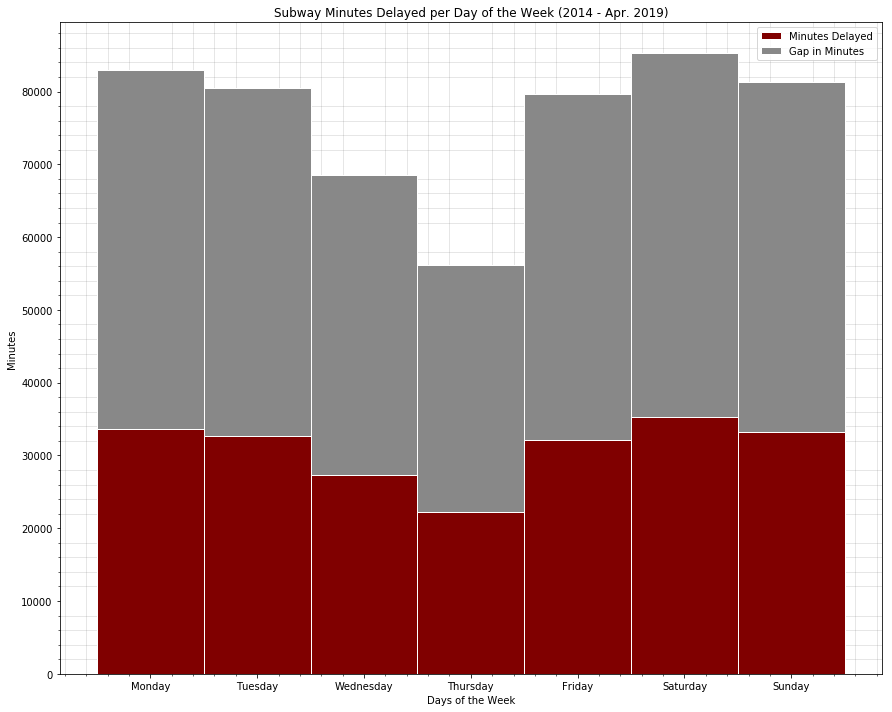

In [40]:
bar1 = weekdays['Sum of Minutes']
bar2 = weekdays['Sum of Gap Minutes']

label = weekdays['Day']
barwidth = 1
names = weekdays['Day'].unique().tolist()
dayorder = [1, 5, 6, 4, 0, 2, 3]
names = [names[i] for i in dayorder]

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

p1 = ax.bar(label, bar1, color='#800000', edgecolor='white', width=barwidth)
p2 = ax.bar(label, bar2, bottom=bar1, color='#888888', edgecolor='white', width=barwidth)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days of the Week')
ax.set_title('Subway Minutes Delayed per Day of the Week (2014 - Apr. 2019)')

plt.legend((p1[0], p2[0]), ('Minutes Delayed', 'Gap in Minutes'))

plt.xticks(label, names)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()

plt.savefig('./Output/Subway Minutes Delayed per Day of the Week.png')
plt.show()

In [41]:
subway.head()

,Unnamed: 0,Unnamed: 0.1,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
0,0,0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
1,1,1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
2,2,2,2014-01-03,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
3,3,3,2014-01-03,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
4,4,4,2014-01-03,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None


### Time of Day - Incident Counts

In [43]:
timeofday = subway.groupby(['Day', 'Time']).agg({'Min Delay': 'sum'}).reset_index()
timeofday['Time'] = pd.to_datetime(timeofday['Time'].str.strip(), format='%H:%M')
dailyincidents = subway.groupby(['Day', 'Time']).agg({'Min Delay': 'count'}).reset_index()
dailyincidents = dailyincidents.rename(columns={'Min Delay': 'Counts'})
timeofday['Counts'] = dailyincidents['Counts']
timeofday['Time'] = timeofday['Time'].dt.hour
timeofday = timeofday.groupby(['Day', 'Time']).agg({'Min Delay': 'sum', 'Counts': 'sum'}).reset_index().reset_index()
timeofday = timeofday.rename(columns={'index': 'Chronological'})

In [44]:
timeofday.head(10)

,Chronological,Day,Time,Min Delay,Counts
0,0,Friday,0,1552,503
1,1,Friday,1,1008,447
2,2,Friday,2,75,157
3,3,Friday,3,25,50
4,4,Friday,4,5,60
5,5,Friday,5,1054,497
6,6,Friday,6,1813,1138
7,7,Friday,7,1690,948
8,8,Friday,8,1703,1049
9,9,Friday,9,1467,857


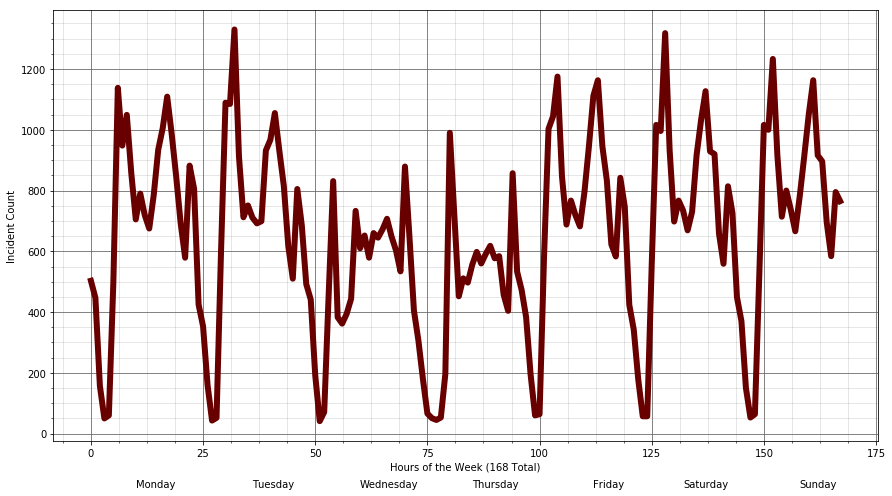

In [45]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.plot(
    timeofday['Chronological'], 
    timeofday['Counts'], 
    color = '#680000', 
    lw = 6
)

ax.set_ylabel('Incident Count')
ax.set_xlabel('Hours of the Week (168 Total)')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.text(10, -175, 'Monday')
plt.text(36, -175, 'Tuesday')
plt.text(60, -175, 'Wednesday')
plt.text(85, -175, 'Thursday')
plt.text(112, -175, 'Friday')
plt.text(132, -175, 'Saturday')
plt.text(158, -175, 'Sunday')

plt.tight_layout()
plt.savefig('./Output/Line Graph of Weekly Subway Delay Incidents.png')

plt.show()

## By Line

In [48]:
subway['Line'].value_counts()

BD                      51643
YU                      48653
SRT                      4010
SHP                      3543
YU/BD                    1004
999                         4
16 MCCOWAN                  2
11 BAYVIEW                  2
510 SPADINA                 2
60 STEELES WEST             1
504 KING                    1
129 MCCOWAN NORTH           1
45 KIPLING                  1
116 MORNINGSIDE             1
95 YORK MILLS               1
37 ISLINGTON                1
704 RAD BUS                 1
9 BELLAMY                   1
126 CHRISTIE                1
341 KEELE                   1
31 GREENWOOD                1
73 ROYAL YORK               1
29 DUFFERIN                 1
104 FAYWOOD                 1
36 FINCH WEST               1
60                          1
85 SHEPPARD EAST            1
63 OSSINGTON                1
BLOOR DANFORTH LINES        1
504                         1
YU/SHEP                     1
BLOOR DANFORTH LINE         1
500                         1
32 EGLINTO

In [49]:
line = subway.groupby(['Date', 'Day', 'Line']).agg({'Min Delay': 'sum', 'Code': 'count'}).reset_index()
line = line[line['Min Delay'] > 0]
line = round(line.groupby(['Day', 'Line']).agg({'Min Delay': 'median', 'Code': 'mean'}), 2).reset_index()
line = line.rename(columns={'Min Delay': 'Median Minutes Delayed per Day', 'Code': 'Median # of Incidents per Day'})
line['Median Incident Length'] = round(line['Median Minutes Delayed per Day'] / line['Median # of Incidents per Day'], 2)
line['Combined'] = line['Day'] + ' ' + line['Line']

In [50]:
line.head()

,Day,Line,Median Minutes Delayed per Day,Median # of Incidents per Day,Median Incident Length,Combined
0,Friday,BD,44.0,29.26,1.50,Friday BD
1,Friday,SHP,5.5,2.69,2.04,Friday SHP
2,Friday,SRT,10.0,3.15,3.17,Friday SRT
3,Friday,YU,45.0,27.32,1.65,Friday YU
4,Monday,BD,41.0,28.55,1.44,Monday BD


In [51]:
monday = line[line['Day'] == 'Monday']
tuesday = line[line['Day'] == 'Tuesday']
wednesday = line[line['Day'] == 'Wednesday']
thursday = line[line['Day'] == 'Thursday']
friday = line[line['Day'] == 'Friday']
saturday = line[line['Day'] == 'Saturday']
sunday = line[line['Day'] == 'Sunday']


In [52]:
sunday

,Day,Line,Median Minutes Delayed per Day,Median # of Incidents per Day,Median Incident Length,Combined
13,Sunday,BD,23.0,17.45,1.32,Sunday BD
14,Sunday,SHP,6.0,2.54,2.36,Sunday SHP
15,Sunday,SRT,8.0,2.46,3.25,Sunday SRT
16,Sunday,YU,25.5,17.63,1.45,Sunday YU


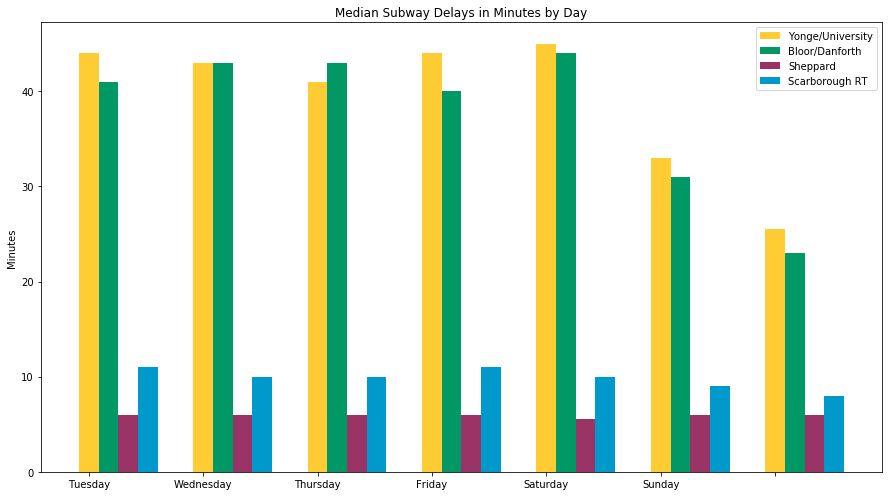

In [53]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
yu_medians = [44, 43, 41, 44, 45, 33, 25.5]
bd_medians = [41, 43, 43, 40, 44, 31, 23]
shp_medians = [6, 6, 6, 6, 5.5, 6, 6]
srt_medians = [11, 10, 10, 11, 10, 9, 8]

width = 0.172
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]


fig, ax = plt.subplots(figsize = [12.5, 7])
bar1 = ax.bar(r1, yu_medians, width, color='#FFCC33', label='Yonge/University')
bar2 = ax.bar(r2, bd_medians, width, color='#009966', label='Bloor/Danforth')
bar3 = ax.bar(r3, shp_medians, width, color='#993366', label='Sheppard')
bar4 = ax.bar(r4, srt_medians, width, color='#0099cc', label='Scarborough RT')


ax.set_ylabel('Minutes')
ax.set_title('Median Subway Delays in Minutes by Day')
#ax.set_xticks(x + 0.25)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [54]:
sunday

,Day,Line,Median Minutes Delayed per Day,Median # of Incidents per Day,Median Incident Length,Combined
13,Sunday,BD,23.0,17.45,1.32,Sunday BD
14,Sunday,SHP,6.0,2.54,2.36,Sunday SHP
15,Sunday,SRT,8.0,2.46,3.25,Sunday SRT
16,Sunday,YU,25.5,17.63,1.45,Sunday YU


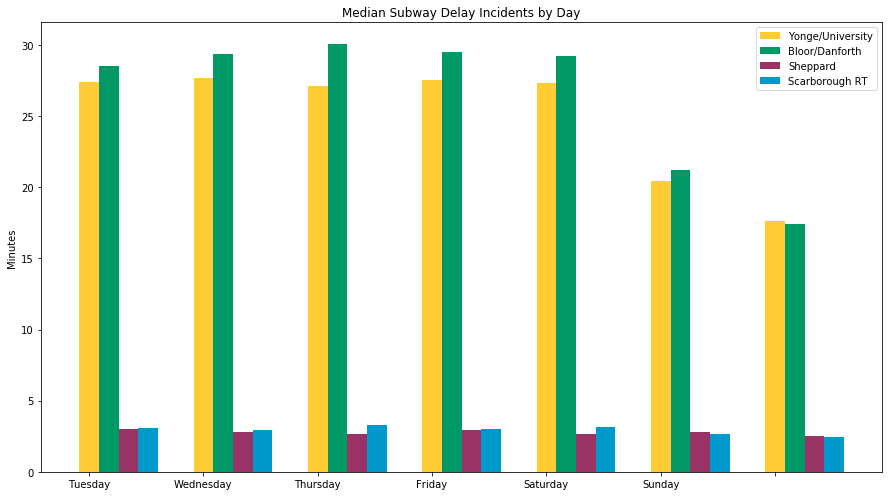

In [55]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
yu_incidents = [27.43, 27.66, 27.11, 27.58, 27.32, 20.45, 17.63]
bd_incidents = [28.55, 29.34, 30.09, 29.51, 29.26, 21.23, 17.45]
shp_incidents = [3.02, 2.77, 2.67, 2.97, 2.69, 2.77, 2.54]
srt_incidents = [3.05, 2.96, 3.3, 3.03, 3.15, 2.63, 2.46]

width = 0.172
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]


fig, ax = plt.subplots(figsize = [12.5, 7])
bar1 = ax.bar(r1, yu_incidents, width, color='#FFCC33', label='Yonge/University')
bar2 = ax.bar(r2, bd_incidents, width, color='#009966', label='Bloor/Danforth')
bar3 = ax.bar(r3, shp_incidents, width, color='#993366', label='Sheppard')
bar4 = ax.bar(r4, srt_incidents, width, color='#0099cc', label='Scarborough RT')


ax.set_ylabel('Minutes')
ax.set_title('Median Subway Delay Incidents by Day')
#ax.set_xticks(x + .25)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# More Analysis

In [68]:

# Read .csv files and store into Pandas data frame
subway = pd.read_csv('./Resources/CleanedData/subway_master.csv')
surface = pd.read_csv('./Resources/CleanedData/surface_master.csv')

In [69]:
# preview the subway dataframe first
# streetcar and bus will be done in sequence
# too many outliers need to remove any 0 minute delays (how can there be a delay if no time is presented) and
# remove any delays over 11 hours in length as instead of taking transit one can instead walk the 43 km
# (4 km/h is a comfortable walking speed) that toronto is in its largest dimension <https://en.wikipedia.org/wiki/Toronto>
subway_clean = subway.loc[(subway["Min Delay"] < 660) & (subway["Min Delay"] > 0)]
subway_clean.reset_index(drop=True, inplace=True)
subway_clean.head(2)

,Unnamed: 0,Unnamed: 0.1,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
0,0,0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
1,1,1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None


In [70]:
# bus dataframe
bus = surface.loc[(surface["Type"] == "Bus") & (surface["Min Delay"] < 660) \
                         & (surface["Min Delay"] > 0)]
bus.reset_index(drop=True, inplace=True)
bus.head(2)

,Unnamed: 0,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
1,1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None


In [71]:
# streetcar dataframe
streetcar = surface.loc[(surface["Type"] == "Streetcar") & (surface["Min Delay"] < 40) \
                               & (surface["Min Delay"] > 0)]
streetcar.reset_index(drop=True, inplace=True)
streetcar.head(2)

,Unnamed: 0,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,421625,2019-01-03,301,1.13,Tuesday,Queen/Braodview,Held By,6.0,13.0,E/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
1,421626,2019-01-03,511,1.50,Tuesday,Bathurst/College,Investigation,5.0,10.0,N/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None


In [72]:
# preview the subway, bus and streetcar columns
print(f'''
Subway
{subway_clean.columns}
Bus
{bus.columns}
Streetcar
{streetcar.columns}
''')


Subway
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Time', 'Day', 'Station', 'Code',
       'Min Delay', 'Min Gap', 'Bound', 'Line', 'Vehicle', 'Year',
       'Description', 'Month', 'nDay', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp', 'Total Rain (mm)', 'Total Snow (cm)', 'Precipitation',
       'Snow on Grnd (cm)', 'Spd of Max Gust (km/h)', 'holiday'],
      dtype='object')
Bus
Index(['Unnamed: 0', 'Date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'Min Delay', 'Min Gap', 'Direction', 'Vehicle', 'Year', 'Type', 'Month',
       'nDay', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp',
       'Total Rain (mm)', 'Total Snow (cm)', 'Precipitation',
       'Snow on Grnd (cm)', 'Spd of Max Gust (km/h)', 'Holiday'],
      dtype='object')
Streetcar
Index(['Unnamed: 0', 'Date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'Min Delay', 'Min Gap', 'Direction', 'Vehicle', 'Year', 'Type', 'Month',
       'nDay', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp',
       '

In [73]:
# preview the number of rows and columns
print(f'''
Subway
Number of rows: {subway_clean.shape[0]}
Number of columns: {subway_clean.shape[1]}
Bus
Number of rows: {bus.shape[0]}
Number of columns: {bus.shape[1]}
Streetcar
Number of rows: {streetcar.shape[0]}
Number of columns: {streetcar.shape[1]}
''')


Subway
Number of rows: 31993
Number of columns: 25
Bus
Number of rows: 399760
Number of columns: 24
Streetcar
Number of rows: 66461
Number of columns: 24



In [74]:
# the subway_clean["Time"] column is a object
# for later analysis a column called "Hour" is added which is a floating point number of the 24 hour clock
time = []
for value in subway_clean["Time"]:
    variable = value.split(":")
    hour = int(variable[0])
    minute = int(variable[1])
    time.append(round(hour + minute/60, 2))
subway_clean["Hour"] = time
subway_clean.head(2)

,Unnamed: 0,Unnamed: 0.1,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,...,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday,Hour
0,0,0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,0.35
1,1,1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,2.10


In [75]:
# According to <https://www.blogto.com/city/2014/04/when_exactly_is_rush_hour_in_toronto/> the TTC states that
# Morning Peak Time is between 6.30 am - 10 am
# Afternoon Peak Time is between 3.30 pm - 7 pm
# Day Time is betwen 10 am - 3:30 pm
# Off Hours are between 7 pm - 6:30 am
# Bin the time of day according to these 4 bins (5 bins but then rename one of the bins in this section)
bins = [0, 6.5, 10, 15.5, 19, 24]
group_names = ["Off Hours1", "Morning Peak Time", "Day Time", "Afternoon Peak Time", "Off Hours2"]
subway_clean["Hour Summary"] = pd.cut(subway_clean["Hour"], bins, labels=group_names)
bus["Hour Summary"] = pd.cut(bus["Time"], bins, labels=group_names)
streetcar["Hour Summary"] = pd.cut(streetcar["Time"], bins, labels=group_names)


# group the days of the week as Weekday or Weekend to observe if there are significant differences in minutes delayed
conditions1 = [
    (subway_clean["Day"] == "Monday") | (subway_clean["Day"] == "Tuesday") | (subway_clean["Day"] == "Wednesday") | \
    (subway_clean["Day"] == "Thursday") | (subway_clean["Day"] == "Friday"), 
    (subway_clean["Day"] == "Saturday") | (subway_clean["Day"] == "Sunday")]
conditions2 = [
    (bus["Day"] == "Monday") | (bus["Day"] == "Tuesday") | (bus["Day"] == "Wednesday") | \
    (bus["Day"] == "Thursday") | (bus["Day"] == "Friday"), 
    (bus["Day"] == "Saturday") | (bus["Day"] == "Sunday")]
conditions3 = [
    (streetcar["Day"] == "Monday") | (streetcar["Day"] == "Tuesday") | (streetcar["Day"] == "Wednesday") | \
    (streetcar["Day"] == "Thursday") | (streetcar["Day"] == "Friday"), 
    (streetcar["Day"] == "Saturday") | (streetcar["Day"] == "Sunday")]
choices = ["Weekday", "Weekend"]

# create new column indentifiying if it is Weekday or Weekend
subway_clean["Weekday"] = np.select(conditions1, choices, default=None)
bus["Weekday"] = np.select(conditions2, choices, default=None)
streetcar["Weekday"] = np.select(conditions3, choices, default=None)

# rename the 2 bins so they can become 1
subway_clean["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
subway_clean["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)
bus["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
bus["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)
streetcar["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
streetcar["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)

In [76]:
# get values such as mean, median, sem, .25 quantile, 0.75 quantile and total count of incidences for 
# each dataframe
subway_clean_route = subway_clean.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
subway_clean_route_low = subway_clean.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
subway_clean_route_high = subway_clean.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
subway_clean_route_low = subway_clean_route_low.reset_index(level=['Weekday', 'Hour Summary'])

bus_route = bus.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
bus_route_low = bus.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
bus_route_high = bus.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
bus_route_low.drop(columns=["Unnamed: 0", "Route", "Time", "Min Gap", "Vehicle", "Year"], inplace=True)
bus_route_low = bus_route_low.reset_index(level=['Weekday', 'Hour Summary'])

streetcar_route = streetcar.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
streetcar_route_low = streetcar.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
streetcar_route_high = streetcar.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
streetcar_route_low.drop(columns=["Unnamed: 0", "Route", "Time", "Min Gap", "Vehicle", "Year"], inplace=True)
streetcar_route_low = streetcar_route_low.reset_index(level=['Weekday', 'Hour Summary'])

In [77]:
# generate dictionaries then form dataframes from them
weekday1 = subway_clean_route_low["Weekday"].tolist()
hour1 = subway_clean_route_low["Hour Summary"].tolist()
quart_1_1 = subway_clean_route_low["Min Delay"].tolist()
quart_3_1 = subway_clean_route_high["Min Delay"].tolist()
median1 = subway_clean_route["Min Delay"]["median"].tolist()
mean1 = round(subway_clean_route["Min Delay"]["mean"], 2).tolist()
error1 = round(subway_clean_route["Min Delay"]["sem"], 2).tolist()

sub_dict = {"Weekday": weekday1, 
        "Time of Day": hour1, 
        "Mean": mean1, 
        "Standard Error": error1, 
        "Median": median1, 
        "0.25 Quartile": quart_1_1, 
        "0.75 Quartile": quart_3_1}

weekday2 = bus_route_low["Weekday"].tolist()
hour2 = bus_route_low["Hour Summary"].tolist()
quart_1_2 = bus_route_low["Min Delay"].tolist()
quart_3_2 = bus_route_high["Min Delay"].tolist()
median2 = bus_route["Min Delay"]["median"].tolist()
mean2 = round(bus_route["Min Delay"]["mean"], 2).tolist()
error2 = round(bus_route["Min Delay"]["sem"], 2).tolist()

bus_dict = {"Weekday": weekday2, 
        "Time of Day": hour2, 
        "Mean": mean2, 
        "Standard Error": error2, 
        "Median": median2, 
        "0.25 Quartile": quart_1_2, 
        "0.75 Quartile": quart_3_2}

weekday3 = streetcar_route_low["Weekday"].tolist()
hour3 = streetcar_route_low["Hour Summary"].tolist()
quart_1_3 = streetcar_route_low["Min Delay"].tolist()
quart_3_3 = streetcar_route_high["Min Delay"].tolist()
median3 = streetcar_route["Min Delay"]["median"].tolist()
mean3 = round(streetcar_route["Min Delay"]["mean"], 2).tolist()
error3 = round(streetcar_route["Min Delay"]["sem"], 2).tolist()


street_dict = {"Weekday": weekday3, 
        "Time of Day": hour3, 
        "Mean": mean3, 
        "Standard Error": error3, 
        "Median": median3, 
        "0.25 Quartile": quart_1_3, 
        "0.75 Quartile": quart_3_3}

# generate dataframes
sub_combined = pd.DataFrame(sub_dict)
bus_combined = pd.DataFrame(bus_dict)
street_combined = pd.DataFrame(street_dict)

In [78]:
# need to reindex and reset index of dataframes as they are in the wrong order
sub_combined2 = sub_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
sub_combined2.reset_index(inplace=True)
sub_combined2.drop(columns="index", inplace=True)

bus_combined2 = bus_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
bus_combined2.reset_index(inplace=True)
bus_combined2.drop(columns="index", inplace=True)

street_combined2 = street_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
street_combined2.reset_index(inplace=True)
street_combined2.drop(columns="index", inplace=True)

In [79]:
# show the statistics summary for each dataframe
# subway first
sub_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,5.66,0.13,4,3.0,6.0
1,Weekday,Day Time,6.71,0.16,4,3.0,6.0
2,Weekday,Afternoon Peak Time,6.04,0.14,4,3.0,6.0
3,Weekday,Off Hours,7.26,0.15,5,3.0,7.0
4,Weekend,Morning Peak Time,7.49,0.46,5,4.0,6.0
5,Weekend,Day Time,7.26,0.41,4,3.0,6.0
6,Weekend,Afternoon Peak Time,7.54,0.50,5,4.0,7.0
7,Weekend,Off Hours,7.74,0.33,5,4.0,7.0


In [80]:
# bus next
bus_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,9.77,0.02,9.0,5.0,13.0
1,Weekday,Day Time,11.14,0.02,10.0,7.0,15.0
2,Weekday,Afternoon Peak Time,11.07,0.02,10.0,7.0,15.0
3,Weekday,Off Hours,11.21,0.02,10.0,6.0,15.0
4,Weekend,Morning Peak Time,13.32,0.06,11.0,9.0,18.0
5,Weekend,Day Time,11.73,0.04,10.0,7.0,15.0
6,Weekend,Afternoon Peak Time,11.40,0.06,10.0,7.0,15.0
7,Weekend,Off Hours,14.09,0.06,11.0,10.0,20.0


In [81]:
# streetcar last
street_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,7.44,0.05,5.0,4.0,9.0
1,Weekday,Day Time,8.19,0.05,6.0,4.0,10.0
2,Weekday,Afternoon Peak Time,8.44,0.07,6.0,4.0,11.0
3,Weekday,Off Hours,8.17,0.04,6.0,5.0,10.0
4,Weekend,Morning Peak Time,8.55,0.11,7.0,5.0,10.0
5,Weekend,Day Time,8.32,0.08,6.0,5.0,10.0
6,Weekend,Afternoon Peak Time,8.34,0.12,6.0,5.0,10.0
7,Weekend,Off Hours,10.80,0.10,9.0,7.0,13.0


In [85]:
# found this code to print pretty tables <https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure/33048932>
# from pandas dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


output = os.path.join(".", "Output")
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        #size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        size = (25, 5)
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(sub_combined2, header_columns=0, col_width=2.0)
subway_stat = os.path.join(output, "subway_statistics.png")
plt.savefig(subway_stat)
plt.close()

render_mpl_table(bus_combined2, header_columns=0, col_width=2.0)
bus_stat = os.path.join(output, "bus_statistics.png")
plt.savefig(bus_stat)
plt.close()

render_mpl_table(street_combined2, header_columns=0, col_width=2.0)
streetcar_stat = os.path.join(output, "streetcar_statistics.png")
plt.savefig(streetcar_stat)
plt.close("all")

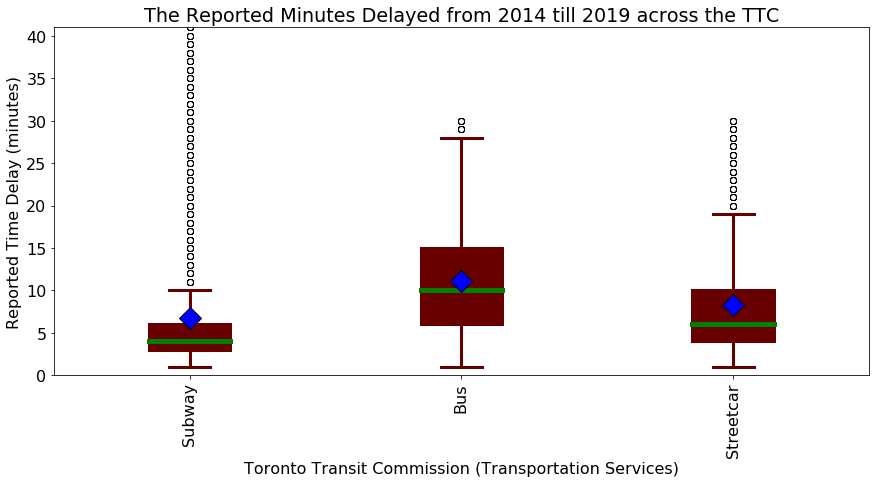

In [86]:
# now time to plot the 3 boxplots of the subway, bus and streetcar minutes delayed for comparison
data1 = subway_clean["Min Delay"].values
data2 = bus["Min Delay"].values
data3 = streetcar["Min Delay"].values
data = [data1, data2, data3]

labels = ["Subway", "Bus", "Streetcar"]

fig = plt.figure(1, figsize = [12.5, 7])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('The Reported Minutes Delayed from 2014 till 2019 across the TTC')

bp = ax.boxplot(data, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_ylim(0, 41)

ax.set_xlabel("Toronto Transit Commission (Transportation Services)")
ax.set_ylabel("Reported Time Delay (minutes)")

plt.xticks(rotation="vertical")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

TTC_min = os.path.join(output, "minute_delay_TTC.png")
plt.savefig(TTC_min)

plt.show()

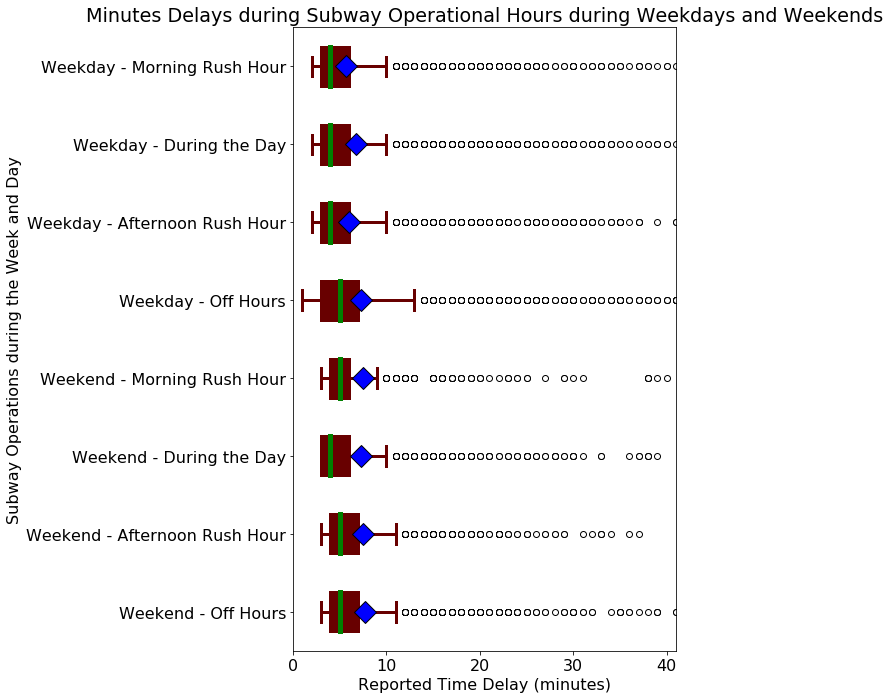

In [87]:
plt.close()

# generate the dataframes needed for the plot
subway_clean_off_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Off Hours")]
subway_clean_off_day.reset_index(drop=True, inplace=True)
subway_clean_morn_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Morning Peak Time")]
subway_clean_morn_day.reset_index(drop=True, inplace=True)
subway_clean_after_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Afternoon Peak Time")]
subway_clean_after_day.reset_index(drop=True, inplace=True)
subway_clean_day_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Day Time")]
subway_clean_day_day.reset_index(drop=True, inplace=True)
subway_clean_off_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Off Hours")]
subway_clean_off_end.reset_index(drop=True, inplace=True)
subway_clean_morn_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Morning Peak Time")]
subway_clean_morn_end.reset_index(drop=True, inplace=True)
subway_clean_after_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Afternoon Peak Time")]
subway_clean_after_end.reset_index(drop=True, inplace=True)
subway_clean_day_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Day Time")]
subway_clean_day_end.reset_index(drop=True, inplace=True)

# now plot 
data8 = subway_clean_morn_day["Min Delay"].values
data7 = subway_clean_day_day["Min Delay"].values
data6 = subway_clean_after_day["Min Delay"].values
data5 = subway_clean_off_day["Min Delay"].values
data4 = subway_clean_morn_end["Min Delay"].values
data3 = subway_clean_day_end["Min Delay"].values
data2 = subway_clean_after_end["Min Delay"].values
data1 = subway_clean_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delays during Subway Operational Hours during Weekdays and Weekends')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Subway Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

subway_min = os.path.join(output, "subway_min_delay.png")
plt.savefig(subway_min)

plt.show()

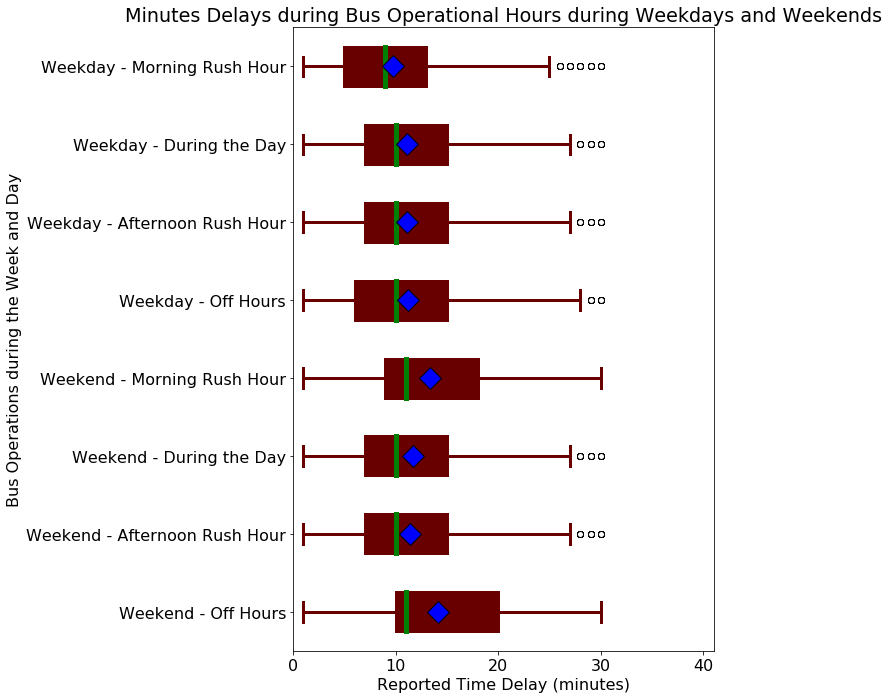

In [88]:
plt.close()

# generate the dataframes for the plot
bus_off_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Off Hours")]
bus_off_day.reset_index(drop=True, inplace=True)
bus_morn_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Morning Peak Time")]
bus_morn_day.reset_index(drop=True, inplace=True)
bus_after_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Afternoon Peak Time")]
bus_after_day.reset_index(drop=True, inplace=True)
bus_day_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Day Time")]
bus_day_day.reset_index(drop=True, inplace=True)
bus_off_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Off Hours")]
bus_off_end.reset_index(drop=True, inplace=True)
bus_morn_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Morning Peak Time")]
bus_morn_end.reset_index(drop=True, inplace=True)
bus_after_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Afternoon Peak Time")]
bus_after_end.reset_index(drop=True, inplace=True)
bus_day_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Day Time")]
bus_day_end.reset_index(drop=True, inplace=True)

# now plot
data8 = bus_morn_day["Min Delay"].values
data7 = bus_day_day["Min Delay"].values
data6 = bus_after_day["Min Delay"].values
data5 = bus_off_day["Min Delay"].values
data4 = bus_morn_end["Min Delay"].values
data3 = bus_day_end["Min Delay"].values
data2 = bus_after_end["Min Delay"].values
data1 = bus_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delays during Bus Operational Hours during Weekdays and Weekends')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Bus Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

bus_min = os.path.join(output, "bus_min_delay.png")
plt.savefig(bus_min)

plt.show()

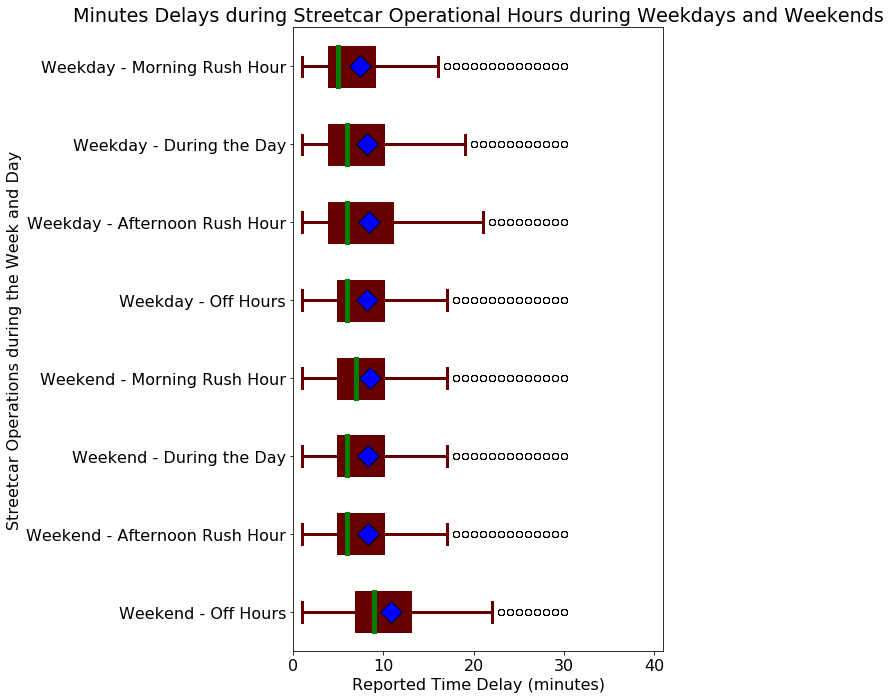

In [89]:
plt.close()

# generate dataframes for plots
streetcar_off_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Off Hours")]
streetcar_off_day.reset_index(drop=True, inplace=True)
streetcar_morn_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Morning Peak Time")]
streetcar_morn_day.reset_index(drop=True, inplace=True)
streetcar_after_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Afternoon Peak Time")]
streetcar_after_day.reset_index(drop=True, inplace=True)
streetcar_day_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Day Time")]
streetcar_day_day.reset_index(drop=True, inplace=True)
streetcar_off_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Off Hours")]
streetcar_off_end.reset_index(drop=True, inplace=True)
streetcar_morn_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Morning Peak Time")]
streetcar_morn_end.reset_index(drop=True, inplace=True)
streetcar_after_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Afternoon Peak Time")]
streetcar_after_end.reset_index(drop=True, inplace=True)
streetcar_day_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Day Time")]
streetcar_day_end.reset_index(drop=True, inplace=True)

# now plot it
data8 = streetcar_morn_day["Min Delay"].values
data7 = streetcar_day_day["Min Delay"].values
data6 = streetcar_after_day["Min Delay"].values
data5 = streetcar_off_day["Min Delay"].values
data4 = streetcar_morn_end["Min Delay"].values
data3 = streetcar_day_end["Min Delay"].values
data2 = streetcar_after_end["Min Delay"].values
data1 = streetcar_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delays during Streetcar Operational Hours during Weekdays and Weekends')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Streetcar Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

streetcar_min = os.path.join(output, "streetcar_min_delay.png")
plt.savefig(streetcar_min)

plt.show()